# 5. Probability Models for a Continuous Random Variable
<hr>

1. Uniform Distribution
2. Exponential Distribution
3. Normal Distribution
4. Gamma Distribution
5. Beta Distribution
6. Chi-Square Distribution
7. Student's $t$ Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *

## What is a Kernel?
<hr>

The term **kernel** often refers to the part of the pdf or pmf that contains all the information about the distribution except for the normalizing constant. For a continuous probability distribution with a pdf $f(x)$, the kernel is the part of $f(x)$ that contains all of the $x$ terms after the constant of integration have been removed. Essentially, the kernel represents the "shape" of the distribution.

## 5.1 Uniform Distribution
<hr>

In the uniform distribution, all outcomes are equally likely. It's characterized by two parameters: a lower bound 
$a$ and an upper bound $b$.

$$X \sim \text{Uniform}(a, b)$$

<br>

<div style="text-align:center">
    <img src="media/uniform.png" width=300>
    <figcaption>Uniform Distribution</figcaption>
</div>

\begin{align}
f(x) &= \frac{1}{b-a}, \quad a \leq x \leq b & \text{PDF of Uniform RV} \\
\\
F(x) &= \frac{x-a}{b-a}, \quad a \leq x \leq b & \text{CDF of Uniform RV} \\
\\
E(X) &= \frac{a+b}{2} & \text{Expectation} \\
\\
\text{Var}(X) &= \frac{(b-a)^2}{12} & \text{Variance} \\
\end{align}

### 5.1.1 Standard Uniform Distribution
<hr>
If $a=0$ and $b=1$, then the uniform distribution is called `standard uniform distribution`.

**Example:** If a flight is scheduled to arrive at 5pm but actually arrives at a uniformly distributed time between 4:50pm and 5:10pm, what’s the probability that the flight arrives between 5pm and 5:05pm?

<br> 
<div style="text-align:center">
    <img src="media/uniform1.png" width=300>
    <figcaption>Example of Standard Uniform, $P=1/4$</figcaption>
</div>

Let $a=0$ (that is 4:50pm) and $b=20$ (that is 5:10pm):

$$P(10 \leq x \leq 15) = \int_{10}^{15} f(x) dx = \int_{10}^{15} \frac{1}{20} dx = \frac{1}{20} (15-10)= \frac{1}{4}$$

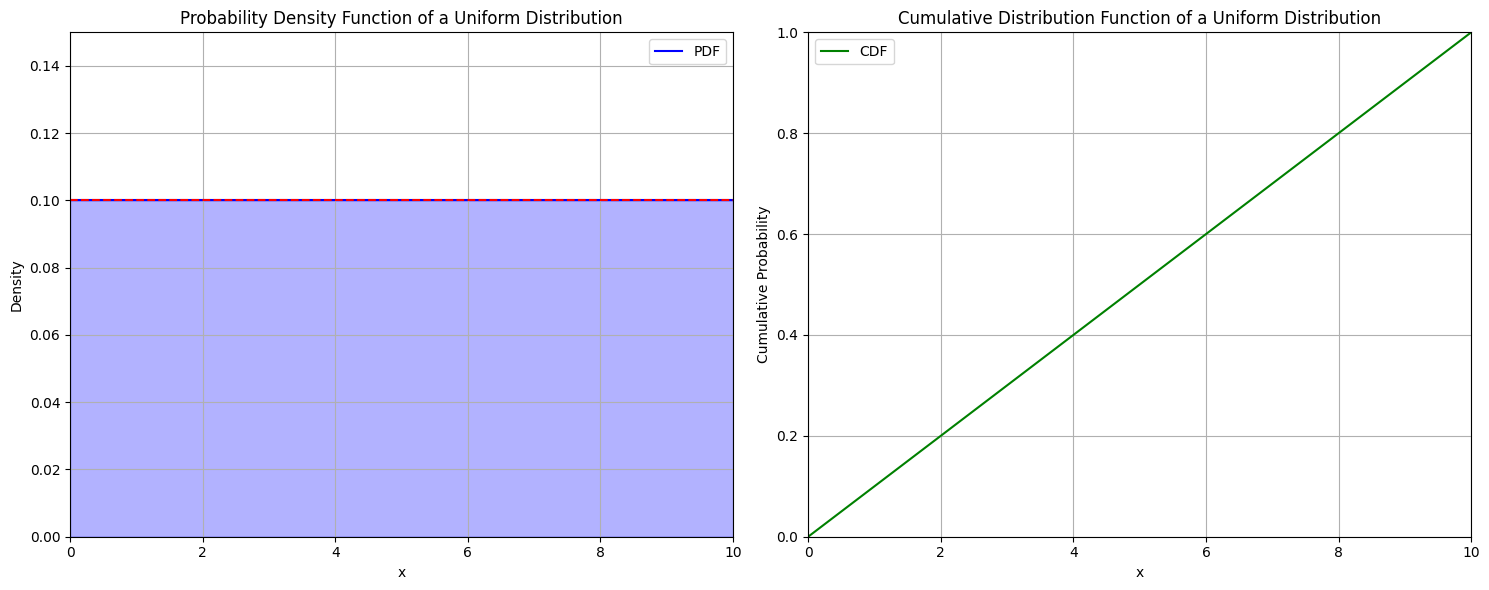

In [2]:
plot_uniform(a=0, b=10)

## 5.2 Exponential Distribution
<hr>

The Exponential Distribution is widely used to model the time until a rare event occurs or the time between such events. It is particularly significant in reliability analysis and queuing theory.

$$X \sim \text{exp}(\lambda)$$

Where $\lambda$ is the rate parameter, indicating the average number of events in a given time interval.

\begin{align}
f(x) &= \lambda e^{-\lambda x}, \quad x \gt 0 & \text{PDF of Exponential} \\
\\
F(a) &= 1-e^{-\lambda a} & \text{CDF of Exponential} \\
\\
E(X) &= \frac{1}{\lambda} & \text{Expectation} \\
\\
\text{Var}(X) &= \frac{1}{\lambda^2} & \text{Variance} \\
\end{align}

The CDF is derived as:

$$F(a) = P(X \leq a) = \int_0^a \lambda e^{-\lambda x} dx = 1 - e^{-\lambda x}$$

###  5.2.1 Memoryless Property
The Exponential Distribution is "memoryless," meaning the probability of an event occurring in the future is independent of any history. For example, if the waiting time in a bank has already been 5 minutes, the probability of waiting an additional 10 minutes is the same as if the waiting had just begun.

Mathematically, this property is expressed as:

$$P(T > t + x \mid T > t) = P(T > x), \forall{t}, x > 0$$

Here, $T$ represents the waiting time and follows an Exponential Distribution with rate $\lambda$.

### 5.2.2 Relation to Poisson Distribution
While the Poisson Distribution models the number of discrete occurrences in a fixed interval, the Exponential Distribution models the time between such continuous occurrences.

**Example:** Jobs are sent to a printer at an average rate of 3 jobs per hour.

What's the expected time between jobs?

$$\lambda=3 \quad E(X)=\frac{1}{\lambda}=\frac{1}{3}$$

What's the probability that the next job is sent within 5 minutes?

$$P(X<5)=F(5)$$

Notice that we modeled the expected value in hours, therefore:

$$P(X<5)=F\left(\frac{5}{60}\right)=F\left(\frac{1}{12}\right)=1-e^\left(\frac{-3}{12}\right)=1-e^\left(\frac{-1}{4}\right)$$

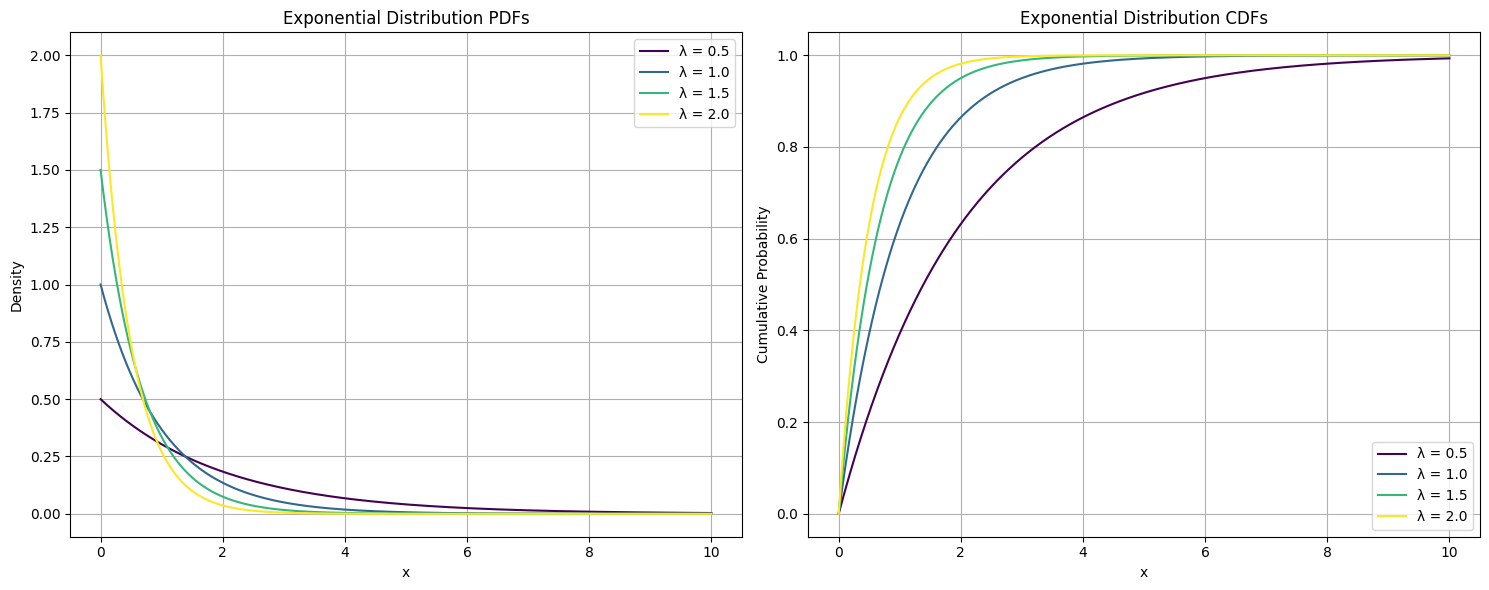

In [3]:
lambda_values=np.array([0.5, 1, 1.5, 2])
plot_exponential(lambda_values)

## 5.3 Normal Distribution
<hr>

The Normal Distribution, also known as the Gaussian Distribution, is a cornerstone of probability theory and statistics due to its properties and natural occurrences in many real-world scenarios.

$$X \sim N(\mu, \sigma^2)$$

Where $\mu$ is the center of the distribution and $\sigma^2$ is the spread or variance of the distribution.

### 5.3.1 Normal PDF

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-1}{2} \left( \frac{X-\mu}{\sigma} \right)^2}$$

\begin{align}
E(X) &= \mu & \text{Expectation} \\
\\
\text{Var}(X) &= \sigma^2 & \text{Variance} \\
\end{align}

### 5.3.2 Significance of the Normal Distribution
- Ubiquitous in Real-World Data: Heights, weights, test scores, and many other types of data naturally follow a normal distribution.
- **Analytical Tractability:** Its mathematical properties make it convenient for statistical analysis.
- **Central Limit Theorem:** The theorem states that the distribution of sample averages approximates a normal distribution as the sample size becomes large, regardless of the shape of the population distribution.

### 5.3.3 Standard Normal Distribution
<hr>

- A special case of the normal distribution with $\mu=0$ and $\sigma=1$
- Notation: $Z \sim N(0,1)$
- **Normalization:** Any normal distribution can be converted to the standard normal distribution using the formula $Z= \frac{X-\mu}{\sigma}$

*$X-\mu$ is the distance of a value of $X$ from the mean value. When we divide that distance by the standard deviation, we are measuring the distance now in units of standard deviation. Therefore, $\frac{X-\mu}{\sigma}$ asks how many standard deviations is $X$ away from the mean value?

**Example:** Assume that an accounting graduate received a job offer of 72k and a marketing graduate also received an offer of 85k. Assume that the distribution of salaries for the accounting job is normally distributed with mean of 60k and standard deviation of 5k. The distribution of salaries for the marketing job is normally distributed with mean of 105k and standard deviation of 2k. Which one of the graduates got a better job offer?

$$Z_1=\frac{X-\mu}{\sigma}=\frac{72-60}{5}=2.4$$

$$Z_2=\frac{X-\mu}{\sigma}=\frac{85-105}{2}=-10$$

Therefore, the accounting major got an offer of 2.4 standard deviations above the mean, while the marketing major got an offer of 10 standard deviations below the mean. In general, 3 standard deviation is considered very poor.

### 5.3.4 Confidence Intervals using Standard Normal
<hr>

If the distribution for a statistic follows the shape of a normal distribution with standard error SE, we find a confidence interval for the parameter using:

$$\text{Sample Statistic} \pm z^* \times SE$$

Where $z^*$ is chosen so that the proportion between $-z^*$ and $+z^*$ in the standard normal distribution is the desired level of confidence. 

*NOTE: if we know one value of $z$, the other value is just the negative of it. Some Normal percentiles for common confidence intervals are:*

|Confidence Level | 80% | 90% | 95% | 98% | 99% |
| ---- | ---- | ---- | ---- | ---- | ---- |
| $z^*$ | 1.282 | 1.645 | 1.960 | 2.326 | 2.576 |


### 5.3.5 Empirical Rule
<hr>

- 68% of the data falls within 1 standard deviation $(\sigma)$ of the mean.
- 95.4% falls within 2 standard deviations of the mean.
- 99.7% falls within 3 standard deviations of the mean.

**Example:** Assume that the height of males follows a normal distribution with mean value equal to $70"$. What proportion of the population is between $70"$ and $70"+2\sigma$.

$$P(\mu \leq X \leq 2\sigma)=\frac{95.4}{2}=0.477$$

### 5.3.6 Central Limit Theorem (CLT)
<hr>

As the sample size $n$ increases, the distribution of the sample means approaches a normal distribution, regardless of the shape of the population distribution. For large $n$, the sample mean $\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$


### 5.3.7 Normal Approximation to the Binomial
<hr>

Let $X \sim \text{Binomial}(n,p)$. If $n$ is large and $\text{min}⁡(n \times p , n(1-p)) \geq 5$, then $X \sim N(np,np(1-p))$.
In the example of tossing a coin, if the coin is biased $P(\text{H or T}) \approx 1$ or $P(\text{H or T}) \approx 0$, then we cannot use this approximation.

**Example:** If $X \sim \text{Binomial}(100,0.45)$, use the Normal approximation to the Binomial to find the probability that $X \geq 30$.

$$\text{min}⁡(100 \times 0.45,100(1-0.45)) = \text{min}(45,55) \geq 5$$

$$X \sim N(100 \times 0.45,100 \times 0.45(1-0.45) = N(45,24.75)$$

$$P(X \geq 30)=0.99871$$

### 5.3.8 Distribution of a Proportion
<hr>

If $n$ is large enough, $\hat{p}$ is approximately normally distributed if $np \geq 10$ and $n(1-p) \geq 10$. If we're doing a confidence interval, since we don't have the value of $p$, it gets replaced by $\hat{p}$ in the conditions. Therefore, $(n\hat{p}, n(1-\hat{p} \geq 10)$

- Confidence Interval = Point estimate $\pm$ Margin of Error
- Confidence Interval = $\hat{p} \pm \text{distribution percentile} \times \text{standard error}$

Note that the standard error of the proportion sample is given as:

$$\sigma_{\hat{p}} = \sqrt{\frac{p(1-p)}{n}}$$

Therefore,

$$\text{Confidence Interval} = \hat{p} \pm z^* \times \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

### 5.3.9 Distribution of a Mean
<hr>

For a sampling distribution, the standard deviation of $\bar{x}$ is given as: $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$. Therefore, the estimated standard error is: $\text{SE}_{\bar{x}} = \frac{s}{\sqrt{n}}$

When we use the SE based on $\frac{s}{\sqrt{n}}$ to standardize the sample mean, the distribution is no longer standard normal. Therefore, we use the t-distribution to avoid this difficulty.

$$\text{Confidence Interval} = \bar{x} \pm t . \frac{s}{\sqrt{n}}$$

### 5.3.10 Shapiro-Wilk Test
<hr>

The Shapiro-Wilk test is a statistical test used to determine if a given sample of data comes from a normal distribution. It is based on the null hypothesis that the data is normally distributed. It is a "Goodness-of-fit" test, and basically means "How well does a hypothesized distribution fit a data set?"

For the Shapiro-Wilk test, the hypotheses are given as:
- $H_0$: The data comes from a normal distribution.
- $H_A$: The data does not come from a normal distribution.

**Type I Error:** Conclude that the data comes from a non-normal distribution when it actually comes from a normal. 
**Type II Error:** We don't conclude non-normality when the data comes from a non-normal distribution.

In this case, Type II is the worst error. Therefore, to reduce Type II error, we need a higher α level. For the Shapiro-Wilk test, we use $\alpha=0.2$

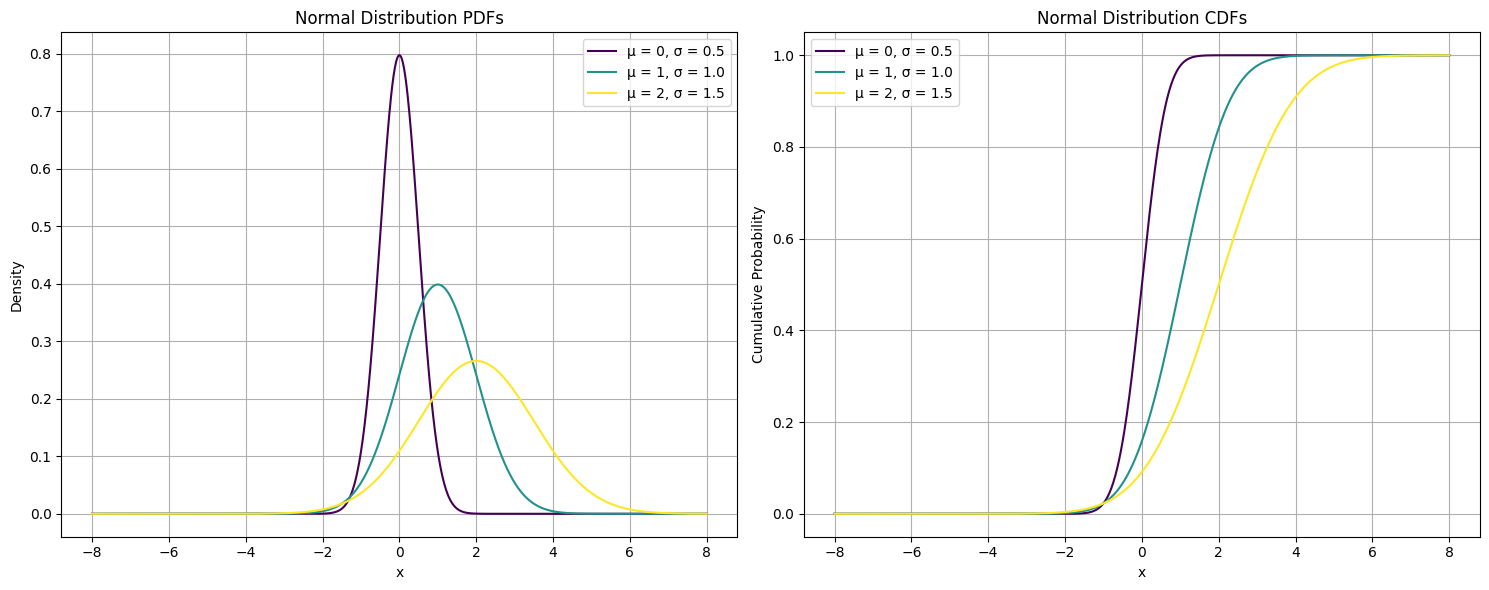

In [4]:
mu_vals = np.array([0, 1, 2])
sigma_vals = np.array([0.5, 1, 1.5])

plot_normal(mu_vals, sigma_vals)

## 5.4 Gamma Distribution
<hr>

The Gamma Distribution is a versatile continuous distribution that is used in various fields, such as queuing theory, finance, and reliability engineering. It generalizes the exponential distribution and is particularly useful when dealing with events that occur in a sequence of stages or steps.

- $X$: A continuous random variable following a gamma distribution.
- $\alpha$ (Alpha): The shape parameter, often interpreted as the number of stages or steps in a process.
- $\lambda$ (Lambda): The rate parameter, similar to that in the exponential distribution.

$$X \sim \text{Gamma}(\alpha, \lambda)$$

### 5.4.1 Gamma Function
The gamma function, denoted by $\gamma(\alpha)$, is a key component in defining the gamma distribution. It is defined for $\alpha>0$ as:

$$\gamma(\alpha) = \int_{0}^{\infty} t^{\alpha-1} e^{-t} dt$$

It satisfies the recurrence relation:

\begin{align}
\gamma(\alpha + 1) &= \alpha \gamma(\alpha) \\
\gamma(\alpha) &= (\alpha - 1)! & \text{for integers} \\
\end{align}

### 5.4.2 PDF of Gamma

$$f(x) = \frac{\lambda^\alpha}{\gamma(\alpha)} x^{\alpha-1} e^{-\lambda x}, \quad x \geq 0,  \alpha, \lambda >0$$

\begin{align}
E(X) &= \frac{\alpha}{\lambda} & \text{Expectation} \\
\text{Var}(X) &= \frac{\alpha}{\lambda^2} & \text{Variance} \\
\end{align}

*Note: For $\alpha=1$, the gamma distribution simplifies to the exponential distribution: $\text{Gamma}(\alpha=1, \lambda) = \text{exp}(\lambda)$*

**Applications**
- Queueing Theory: Modeling the total time of a series of events.
- Reliability Engineering: Modeling the time until failure of a system.
- Finance: Modeling the time until a certain number of events occur.

**Example:** The compilation of a computer program consists of 3 blocks that are processed sequentially one after another. Each block takes exponential time with mean = 5 min independently of other blocks.

**Question:** Compute the expectation and variance of the total compilation time.

Since the time is exponential, the expected value of the exponential distribution is:

$$E(X) = \frac{1}{\lambda} \rightarrow 5 = \frac{1}{\lambda} \rightarrow \lambda=\frac{1}{5}$$

Therefore, the expectation and variance are:

$$E(X) = \frac{\alpha}{\lambda} = \frac{3}{1/5} = 15$$

$$V(X) = \frac{\alpha}{\lambda^2} = \frac{3}{1/25} = 75$$

**Question:** Compute the probability for the entire program to be compiled in less than 12 mins.

$$P(X \leq 12) = \int_{0}^{12} f(x) dx = \int_{0}^{12} \frac{\lambda^\alpha}{\gamma(\alpha)} x^{\alpha-1} e^{-\lambda x} dx = \frac{(1/5)^3}{\gamma(3)} \int_{0}^{12} x^{3-1} e^{\frac{-x}{5}} dx = 0.43029$$

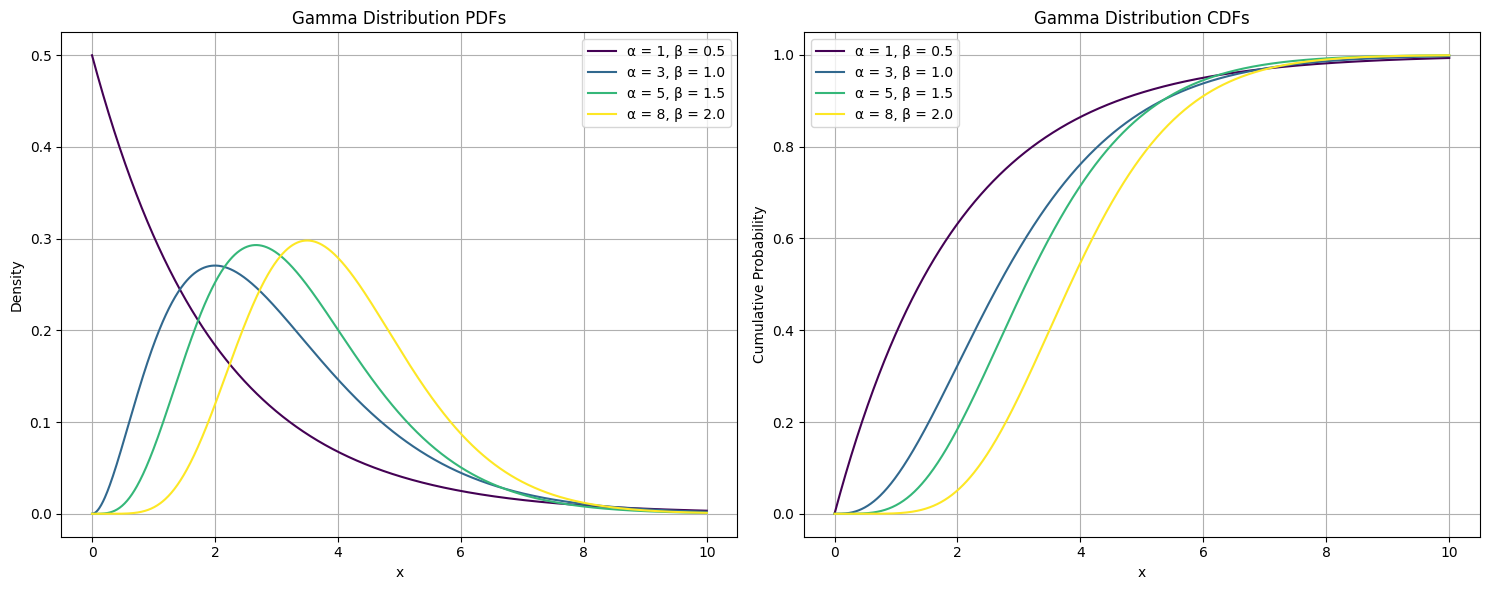

In [5]:
alphas = np.array([1, 3, 5, 8])
betas = np.array([0.5, 1, 1.5, 2])
plot_gamma(alphas, betas)

## 5.5 Beta Distribution
<hr>

The Beta Distribution is a flexible family of continuous probability distributions defined on the interval [0, 1], making it a generalization of the standard uniform distribution. It can model a wide range of different shapes within its domain.

$$X \sim \text{Beta}(\alpha, \beta)$$

### 5.5.1 PDF of Beta

$$f(x) = \left[\frac{\gamma(\alpha+\beta)}{\gamma(\alpha) \gamma(\beta)}\right] x^{\alpha-1} (1-x)^{\beta-1}, \quad 0 \leq x \leq 1$$

Where $\gamma$ represents the gamma function.

\begin{align}
E(X) &= \frac{\alpha}{\alpha + \beta} & \text{Expectation} \\
\text{Var}(X) &= \frac{\alpha \beta}{(\alpha+\beta)^2 (\alpha+\beta+1)} & \text{Variance} \\
\end{align}

*Note: if $\alpha=\beta=1$, the Beta distribution simplifies to the uniform distribution on [0, 1].

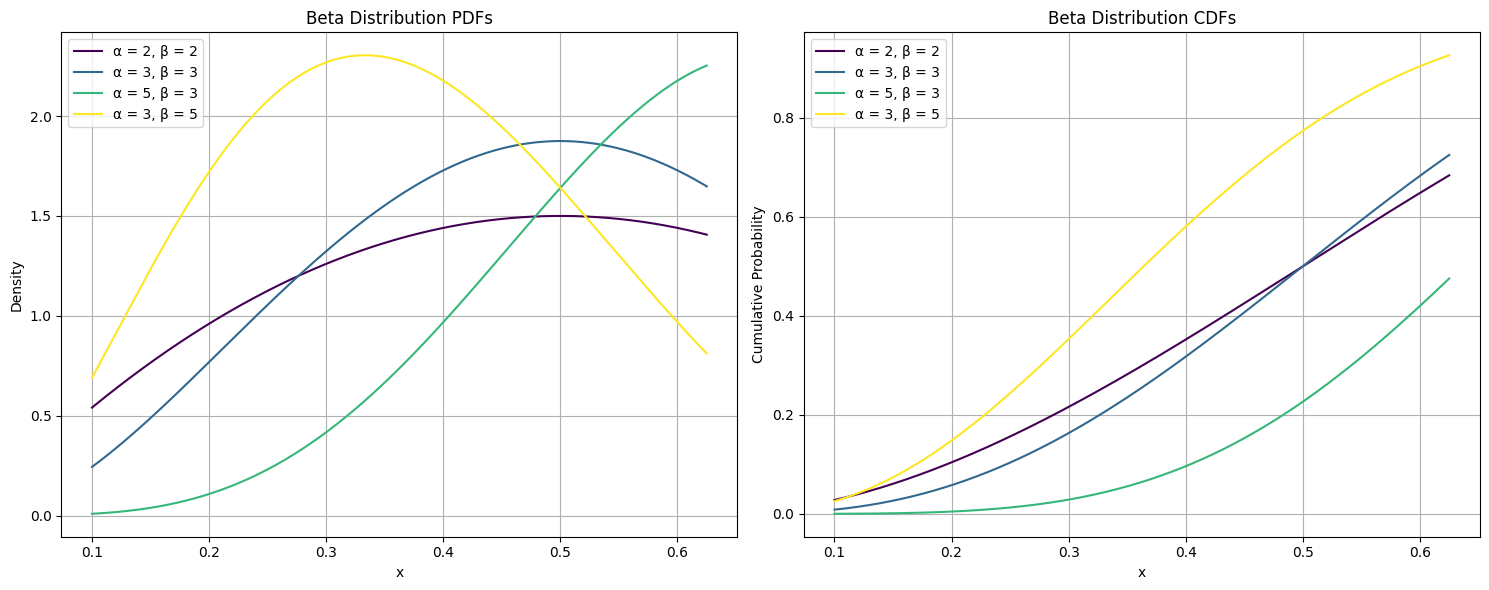

In [2]:
alphas = np.array([2, 3, 5, 3])
betas = np.array([2, 3, 3, 5])
plot_beta(alphas, betas)

- If $\alpha = \beta$, the graph is symmetric between 0 and 1.
- If $\alpha > \beta$, the graph is left-skewed.
- If $\alpha < \beta$, the graph is right-skewed.
- If $\alpha = \beta < 1$, the graph is inverted (like a parabola).

## 5.6 Chi-Square Distribution
<hr>

The Chi-Square Distribution is a widely used probability distribution in inferential statistics, especially in hypothesis testing and in constructing confidence intervals.

- $X$: A random variable following a Chi-Square distribution.
- $\nu$ (nu): Degrees of freedom. It is a critical parameter that influences the shape of the distribution.

$$X \sim \chi^2 (\nu)$$

### 5.6.1 Relationship with Normal Distribution
The Chi-Square distribution is a special case of the Gamma distribution. It is also related to the Normal distribution: if $Z_1, Z_2, \cdots, Z_k$ are iid normal, then the sum of their squares:

$$\sum_{i=1}^k Z_i^2 \sim \chi^2_{(k)}$$

### 5.6.2 PDF of Chi-Square

$$f(x; \nu) = \frac{x^{\frac{\nu}{2} - 1} e^{-\frac{x}{2}}}{2^{\frac{\nu}{2}} \gamma\left(\frac{\nu}{2}\right)}, \quad x > 0$$

\begin{align}
E(X) &= \nu & \text{Expectation} \\
\text{Var}(X) &= 2\nu & \text{Variance} \\
\end{align}

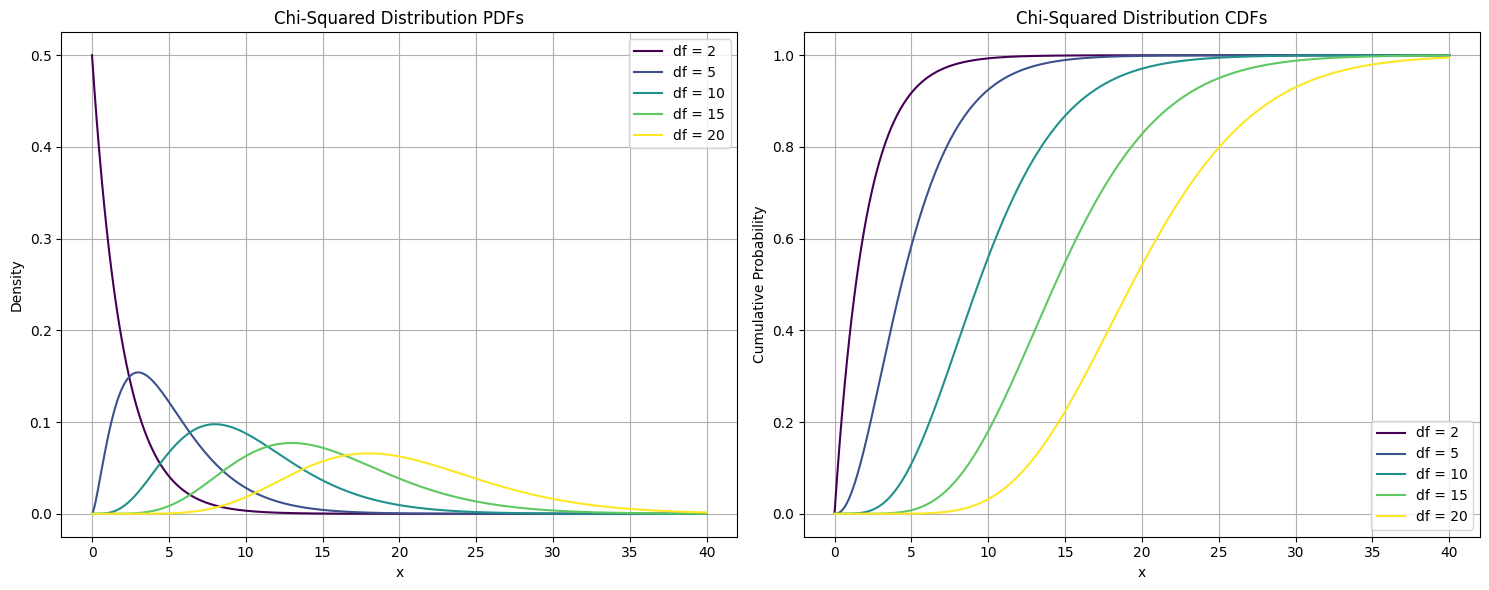

In [2]:
degrees = np.array([2, 5, 10, 15, 20])

plot_chi2(degrees)

## 5.7 Student's $t$-Distribution 
<hr>

The $t$-distribution is a probability distribution that is used to estimate population parameters when the sample size is small and/or the population standard deviation is unknown. It is similar to the standard normal distribution, but has heavier tails, which means that it has more probability in the tails of the distribution than the standard normal distribution. The $t$-distribution is a family of distributions that are characterized by a parameter called degrees of freedom (df). As the degrees of freedom increase, the $t$-distribution approaches the standard normal distribution.

- Mound-shaped and symmetric.
- Centered at zero.
- The standard deviation of a $t$ distribution is:

\begin{cases}
\infty & n=2 \\
\sqrt{\frac{n}{n-2}} & n \geq 3 \\
\end{cases}

Where:

$$lim_{n \rightarrow \infty} \sqrt{\frac{n}{n-2}} = 1$$